## **EXPLORE ARIMA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
nat_gas_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JPMorgan Quantitative Analyst Forage /Nat_Gas.csv', parse_dates=['Dates'], index_col='Dates')

<ipython-input-3-b3260ed933cc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JPMorgan Quantitative Analyst Forage /Nat_Gas.csv', parse_dates=['Dates'], index_col='Dates')


In [ ]:
nat_gas_csv.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [ ]:
nat_gas_csv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [ ]:
nat_gas_df = pd.DataFrame(nat_gas_csv)

In [ ]:
nat_gas_df

,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


In [ ]:
nat_gas_df.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


In [ ]:
nat_gas_df.columns

Index(['Prices'], dtype='object')

In [ ]:
nat_gas_df.index=pd.to_datetime(nat_gas_df.index)

In [ ]:
nat_gas_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


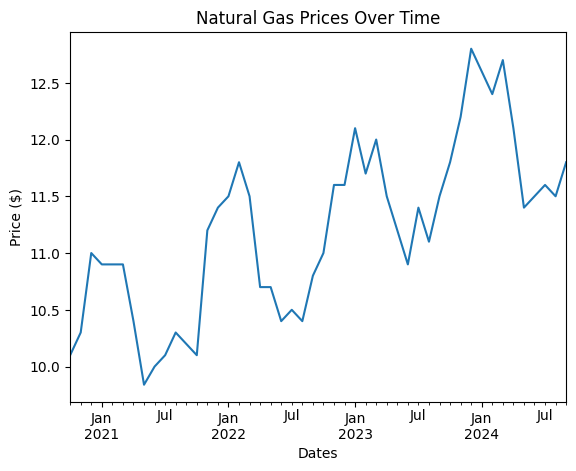

In [ ]:
nat_gas_df['Prices'].plot(title='Natural Gas Prices Over Time')
plt.ylabel('Price ($)')
plt.show()

**MODEL TREND AND SEASONALITY**

Using time series decomposition *statsmodels* to separate trend and seasonal components

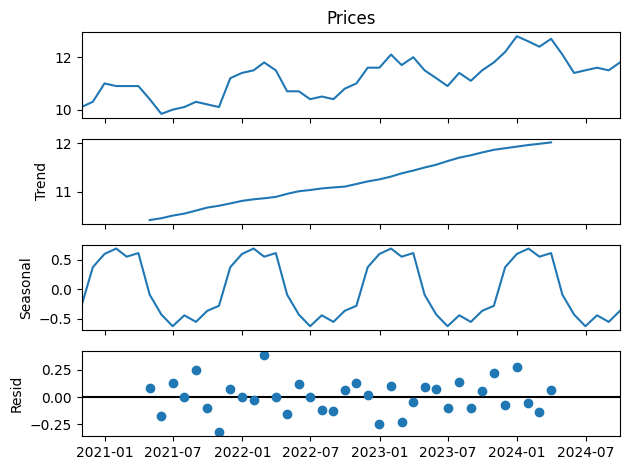

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(nat_gas_df['Prices'], model='additive')
decomposition.plot()
plt.show()

**EXTRAPOLATE PRICES FOR FUTURE**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(nat_gas_df['Prices'], order=(5, 1, 0))  # You may need to tune the order
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
def estimate_price(input_date):
    return nat_gas_df['Prices'].asof(input_date)

# Example: estimate price for a specific date
print(estimate_price('2023-06-15'))

11.2


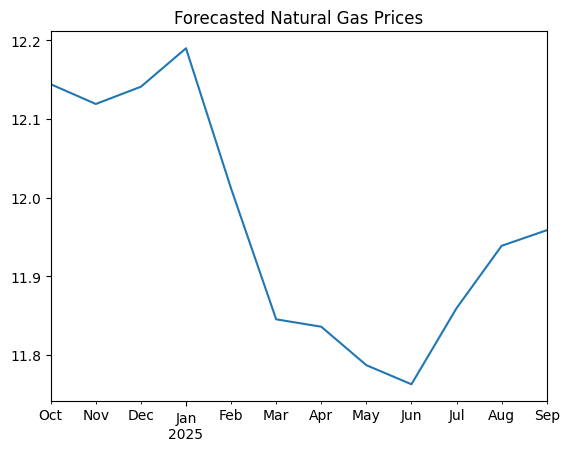

In [ ]:
forecast.plot(title='Forecasted Natural Gas Prices')
plt.show()

In [ ]:
def estimate_price(input_date):
    return nat_gas_df['Prices'].asof(input_date)

In [ ]:
price = estimate_price('2023-09-08')
print(f"Natural Gas Price on 2023-09-08 : {price}")

Natural Gas Price on 2023-09-08 : 11.1


# **LINEAR REGRESSION**

In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

In [4]:
date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

<ipython-input-4-0663ff004a53>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JPMorgan Quantitative Analyst Forage /Nat_Gas.csv', parse_dates=['Dates'])

# converted to numpy array
prices = df['Prices'].values
dates = df['Dates'].values

<ipython-input-5-b8ded38997cd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JPMorgan Quantitative Analyst Forage /Nat_Gas.csv', parse_dates=['Dates'])


In [6]:
print(prices)

[10.1  10.3  11.   10.9  10.9  10.9  10.4   9.84 10.   10.1  10.3  10.2
 10.1  11.2  11.4  11.5  11.8  11.5  10.7  10.7  10.4  10.5  10.4  10.8
 11.   11.6  11.6  12.1  11.7  12.   11.5  11.2  10.9  11.4  11.1  11.5
 11.8  12.2  12.8  12.6  12.4  12.7  12.1  11.4  11.5  11.6  11.5  11.8 ]


In [7]:
print(dates)

['2020-10-31T00:00:00.000000000' '2020-11-30T00:00:00.000000000'
 '2020-12-31T00:00:00.000000000' '2021-01-31T00:00:00.000000000'
 '2021-02-28T00:00:00.000000000' '2021-03-31T00:00:00.000000000'
 '2021-04-30T00:00:00.000000000' '2021-05-31T00:00:00.000000000'
 '2021-06-30T00:00:00.000000000' '2021-07-31T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000' '2021-09-30T00:00:00.000000000'
 '2021-10-31T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-12-31T00:00:00.000000000' '2022-01-31T00:00:00.000000000'
 '2022-02-28T00:00:00.000000000' '2022-03-31T00:00:00.000000000'
 '2022-04-30T00:00:00.000000000' '2022-05-31T00:00:00.000000000'
 '2022-06-30T00:00:00.000000000' '2022-07-31T00:00:00.000000000'
 '2022-08-31T00:00:00.000000000' '2022-09-30T00:00:00.000000000'
 '2022-10-31T00:00:00.000000000' '2022-11-30T00:00:00.000000000'
 '2022-12-31T00:00:00.000000000' '2023-01-31T00:00:00.000000000'
 '2023-02-28T00:00:00.000000000' '2023-03-31T00:00:00.000000000'
 '2023-04-30T00:00:00.000

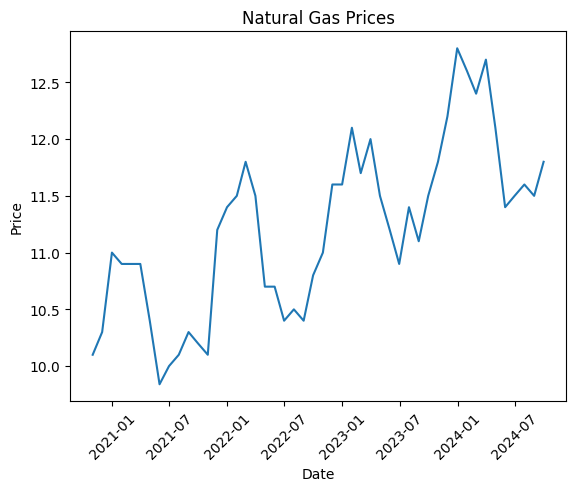

In [8]:
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)
plt.show()

**Generate Time Intervals (Days from Start Date)**

In [9]:
start_date = date(2020, 10, 31)
end_date = date(2024, 9, 30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1


**Calculate Days from Start**

In [10]:
days_from_start = [(day - start_date).days for day in months]

In [11]:
print(days_from_start)

[0, 30, 61, 92, 120, 151, 181, 212, 242, 273, 304, 334, 365, 395, 426, 457, 485, 516, 546, 577, 607, 638, 669, 699, 730, 760, 791, 822, 850, 881, 911, 942, 972, 1003, 1034, 1064, 1095, 1125, 1156, 1187, 1216, 1247, 1277, 1308, 1338, 1369, 1400, 1430]


**Simple Linear Regression**

In [12]:
def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
    intercept = ybar - slope * xbar
    return slope, intercept

**Apply Linear Regression to Time & Prices**

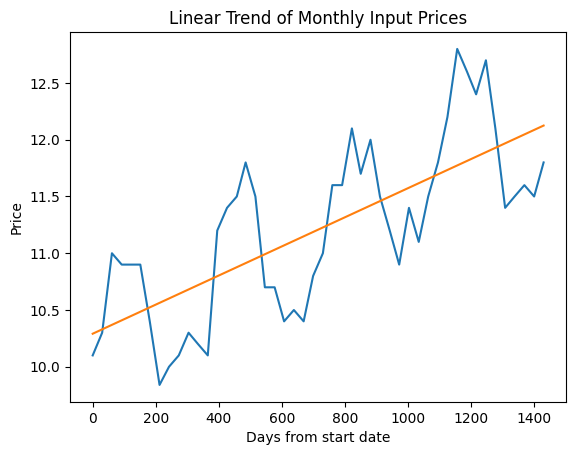

In [13]:
time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()

**Bilinear Regression for Seasonal Component (Sine/Cosine Fit)**

In [14]:
sin_prices = prices - (time * slope + intercept)  #actual price deviates from the linear trend
sin_time = np.sin(time * 2 * np.pi / 365) # sine wave that completes one full cycle every 365 days
cos_time = np.cos(time * 2 * np.pi / 365) #cosine wave, which is shifted by 90 degrees (or 𝜋/2 radians)

# Asin(θ)+Bcos(θ) can be rewritten as 𝑅sin(𝜃+𝜙), allowing you to capture both the amplitude R and the phase shift 𝜙

def bilinear_regression(y, x1, x2):
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2) # Coefficient A
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2) # Coefficient B
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)
print(f"sin_prices: {sin_prices}")
print(f"sin_time: {sin_time}")
print(f"cos_time: {cos_time}")
print(f"Slope1: {slope1}")
print(f"Slope2: {slope2}")

sin_prices: [-0.19104113 -0.02951233  0.63073408  0.4909805   0.45507404  0.41532046
 -0.12315075 -0.72290433 -0.60137554 -0.54112912 -0.3808827  -0.51935391
 -0.65910749  0.4024213   0.56266772  0.62291414  0.88700768  0.5472541
 -0.29121711 -0.33097069 -0.6694419  -0.60919548 -0.74894906 -0.38742027
 -0.22717385  0.33435494  0.29460136  0.75484778  0.31894132  0.57918773
  0.04071653 -0.29903706 -0.63750826 -0.17726185 -0.51701543 -0.15548664
  0.10475978  0.46628858  1.02653499  0.78678141  0.54959258  0.809839
  0.17136779 -0.56838579 -0.506857   -0.44661058 -0.58636416 -0.32483537]
sin_time: [ 0.00000000e+00  4.93775550e-01  8.67456355e-01  9.99916659e-01
  8.80012204e-01  5.16062391e-01  2.58184402e-02 -4.86272707e-01
 -8.54322170e-01 -9.99916659e-01 -8.67456355e-01 -5.08670944e-01
  6.43249060e-16  4.93775550e-01  8.67456355e-01  9.99916659e-01
  8.80012204e-01  5.16062391e-01  2.58184402e-02 -4.86272707e-01
 -8.54322170e-01 -9.99916659e-01 -8.67456355e-01 -5.08670944e-01
  1.28

**Recover Amplitude and Phase Shift of Sine Wave**

In [15]:
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

In [16]:
print(f"Amplitude: {amplitude}")
print(f"Phase Shift: {shift} radians")

Amplitude: 0.6657921292706733
Phase Shift: -0.062231138772283846 radians


**Plotting the Sinusoidal Model**

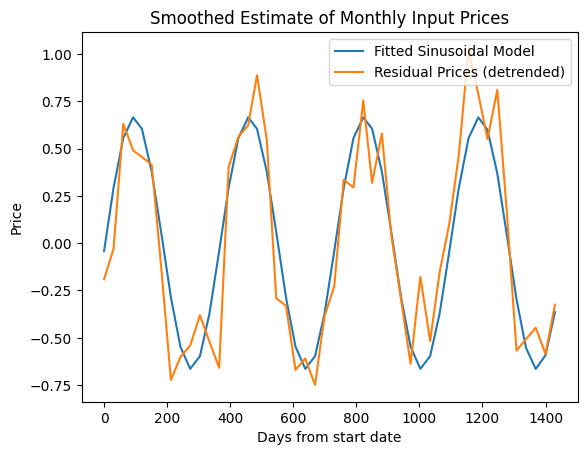

In [17]:
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift), label='Fitted Sinusoidal Model')
plt.plot(time, sin_prices, label="Residual Prices (detrended)")
plt.legend()
plt.title('Smoothed Estimate of Monthly Input Prices')
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.plot
plt.show()

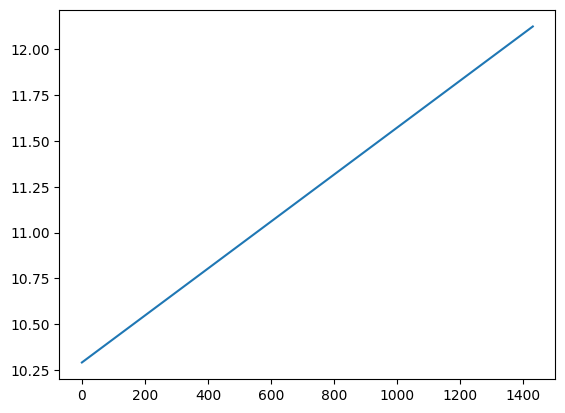

In [18]:
plt.plot(time, time * slope + intercept, label="Linear Trend")

**Interpolation/Extrapolation Function**

In [19]:
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        return prices[days_from_start.index(days)]
    else:
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

**Prediction**

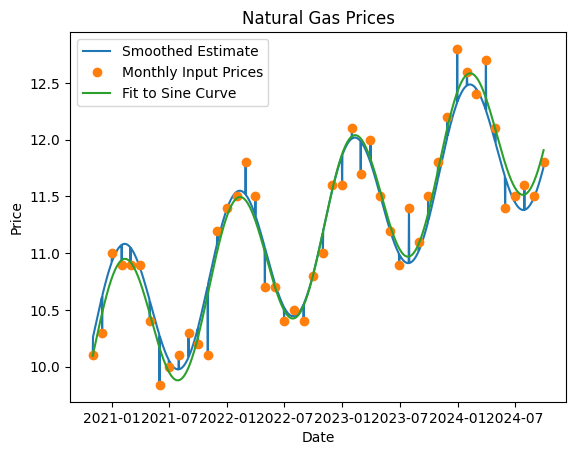

In [20]:
# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()


In [21]:
date1=pd.Timestamp('2023-09-08')
price = interpolate(date1)
print(f"Natural Gas Price on 2023-09-08 : {price}")

Natural Gas Price on 2023-09-08 : 11.076352459879555


#**PART 2**

In [34]:
import pandas as pd

def price_contract(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_volume, storage_costs_per_day):
    # Initialize total volume and total cost
    total_volume = 0
    total_cost = 0
    storage_volume = 0
    storage_days = 0

    injection_dates = pd.to_datetime(injection_dates)
    withdrawal_dates = pd.to_datetime(withdrawal_dates)

    # Sort dates to ensure correct order
    injection_dates = injection_dates.sort_values()
    withdrawal_dates = withdrawal_dates.sort_values()

    # Process Injection Dates (buying gas)
    for date in injection_dates:
        price_on_date = interpolate(date)  # Get price for the given date
        volume_injected = min(injection_rate, max_volume - total_volume)  # Inject within limits
        total_cost += price_on_date * volume_injected
        total_volume += volume_injected
        storage_volume += volume_injected

    # Process Withdrawal Dates (selling gas)
    total_revenue = 0
    for date in withdrawal_dates:
        price_on_date = interpolate(date)  # Get price for the given date
        volume_withdrawn = min(withdrawal_rate, storage_volume)  # Withdraw up to available volume
        total_revenue += price_on_date * volume_withdrawn
        total_volume -= volume_withdrawn
        storage_volume -= volume_withdrawn

    # Calculate storage costs based on storage days
    storage_days = (max(withdrawal_dates) - min(injection_dates)).days
    storage_costs = storage_days * storage_costs_per_day

    # Net Profit Calculation
    net_profit = total_revenue - total_cost - storage_costs

    return {
        "Total Revenue": total_revenue,
        "Total Cost": total_cost,
        "Storage Costs": storage_costs,
        "Net Profit": net_profit
    }


In [36]:
# Test case setup
injection_dates = ["2024/04/01", "2024/04/02", "2024/04/03"]
withdrawal_dates = ["2024/10/01", "2024/10/02", "2024/10/03"]
injection_rate = 5000  # cubic meters per day
withdrawal_rate = 6000  # cubic meters per day
max_volume = 10000  # cubic meters
storage_cost = 0.1  # USD per cubic meter per day

# Example prices
injection_prices = [3.0, 3.2, 3.1]  # USD per cubic meter
withdrawal_prices = [4.5, 4.6, 4.7]  # USD per cubic meter

# Call the function
contract_value = price_contract(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_volume, storage_cost)

print(contract_value)


{'Total Revenue': 117760.58897061157, 'Total Cost': 122465.44714288403, 'Storage Costs': 18.5, 'Net Profit': -4723.358172272463}
